Data Analysis and Preparation (Data Engineering)

In [1]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

# Combine data for analysis

In [2]:
# combine data for analysis

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the CSV files in the 'data' folder
for file in os.listdir("../data-input"):
    if file.endswith(".csv"):
        # Extract the ticker from the filename
        ticker = file.split("_")[0]
        df = pd.read_csv(f"../data-input/{file}")
        df["Ticker"] = ticker  # Add a column for the ticker
        dataframes.append(df)

# Combine all DataFrames
combined_data = pd.concat(dataframes)

# Save the combined data to a new CSV
combined_data.to_csv("../data-output/combined_stock_data.csv", index=False)

print("Combined data saved to ../data-output/combined_stock_data.csv")

Combined data saved to ../data-output/combined_stock_data.csv


In [3]:
# Load the combined data
file_path = "../data-output/combined_stock_data.csv"  # Replace with your file path
combined_data = pd.read_csv(file_path)

# Display the first few rows to inspect the issue
print(combined_data.head())

        Price              Close               High                Low  \
0      Ticker               GOOG               GOOG               GOOG   
1        Date                NaN                NaN                NaN   
2  2020-01-02  68.12372589111328  68.16208598510593  66.83734758257737   
3  2020-01-03  67.78942108154297  68.37930442399039  67.03632869883518   
4  2020-01-06  69.46092224121094  69.57500664769613   67.2583337483084   

                Open    Volume Ticker  
0               GOOG      GOOG   GOOG  
1                NaN       NaN   GOOG  
2  66.83734758257737  28132000   GOOG  
3  67.15171305828703  23728000   GOOG  
4   67.2583337483084  34646000   GOOG  


Fix errors

In [4]:
# Define the correct column names
column_names = ["Date", "Close", "High", "Low", "Open", "Volume", "Ticker"]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the CSV files in the 'data' folder
for file in os.listdir("../data-input"):
    if file.endswith(".csv"):
        print(f"Processing {file}...")
        # Extract the ticker from the filename
        ticker = file.split("_")[0]
        
        # Load the file starting from the third row
        df = pd.read_csv(f"../data-input/{file}", skiprows=2, names=column_names)
        
        # Add the Ticker column (to ensure consistency)
        df["Ticker"] = ticker
        
        # Convert 'Date' to datetime
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
        
        # Drop rows with invalid dates
        df = df.dropna(subset=["Date"])
        
        dataframes.append(df)

# Combine all DataFrames
combined_data = pd.concat(dataframes, ignore_index=True)

# Ensure 'Date' is in datetime format
combined_data["Date"] = pd.to_datetime(combined_data["Date"], errors="coerce")

# Check for any missing dates
print(combined_data[combined_data["Date"].isna()])


# Save the combined data to a new CSV
combined_data.to_csv("../data-output/combined_stock_data.csv", index=False)

print("Combined data saved to '../data-output/combined_stock_data.csv'")


Processing GOOG_stock_data.csv...
Processing MSFT_stock_data.csv...
Processing TSLA_stock_data.csv...
Empty DataFrame
Columns: [Date, Close, High, Low, Open, Volume, Ticker]
Index: []
Combined data saved to '../data-output/combined_stock_data.csv'


C:\Users\idamn\AppData\Local\Temp\ipykernel_26396\401384103.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
C:\Users\idamn\AppData\Local\Temp\ipykernel_26396\401384103.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
C:\Users\idamn\AppData\Local\Temp\ipykernel_26396\401384103.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [5]:
print(combined_data.head())
print(combined_data.info())

        Date      Close       High        Low       Open      Volume Ticker
0 2020-01-02  68.123726  68.162086  66.837348  66.837348  28132000.0   GOOG
1 2020-01-03  67.789421  68.379304  67.036329  67.151713  23728000.0   GOOG
2 2020-01-06  69.460922  69.575007  67.258334  67.258334  34646000.0   GOOG
3 2020-01-07  69.417580  69.898350  69.270107  69.646760  30054000.0   GOOG
4 2020-01-08  69.964615  70.326314  69.293024  69.354799  30560000.0   GOOG
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3018 non-null   datetime64[ns]
 1   Close   3018 non-null   float64       
 2   High    3018 non-null   float64       
 3   Low     3018 non-null   float64       
 4   Open    3018 non-null   float64       
 5   Volume  3018 non-null   float64       
 6   Ticker  3018 non-null   object        
dtypes: datetime64[ns](1), float64(5), obj

## Analysis

In [6]:
# Calculate daily returns
combined_data["Daily Return"] = combined_data.groupby("Ticker")["Close"].pct_change()

# Display the first few rows with daily returns
print(combined_data[["Date", "Ticker", "Close", "Daily Return"]].head())


        Date Ticker      Close  Daily Return
0 2020-01-02   GOOG  68.123726           NaN
1 2020-01-03   GOOG  67.789421     -0.004907
2 2020-01-06   GOOG  69.460922      0.024657
3 2020-01-07   GOOG  69.417580     -0.000624
4 2020-01-08   GOOG  69.964615      0.007880


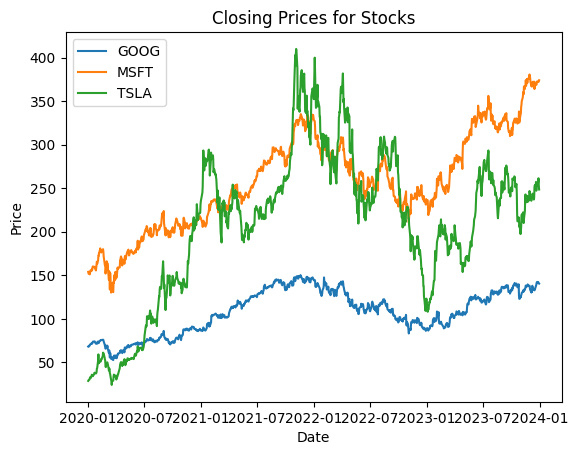

<Figure size 640x480 with 0 Axes>

In [7]:
# Plot closing prices for each stock
for ticker in combined_data["Ticker"].unique():
    ticker_data = combined_data[combined_data["Ticker"] == ticker]
    plt.plot(ticker_data["Date"], ticker_data["Close"], label=ticker)

plt.title("Closing Prices for Stocks")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# save image
plt.savefig("../graphs/closing_prices.png")

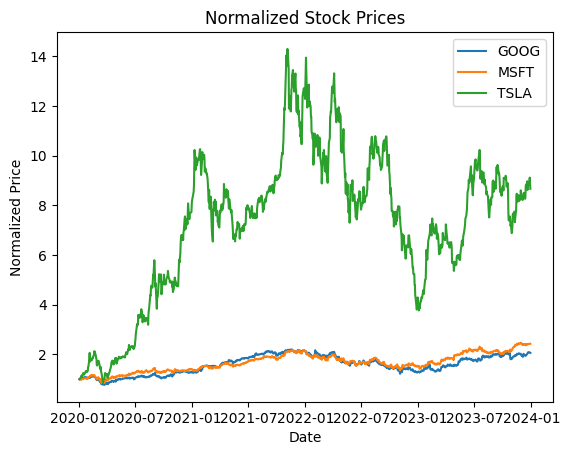

<Figure size 640x480 with 0 Axes>

In [8]:
# Normalize closing prices by dividing by the first closing price
combined_data["Normalized Close"] = combined_data.groupby("Ticker")["Close"].transform(lambda x: x / x.iloc[0])

# Plot normalized prices
for ticker in combined_data["Ticker"].unique():
    ticker_data = combined_data[combined_data["Ticker"] == ticker]
    plt.plot(ticker_data["Date"], ticker_data["Normalized Close"], label=ticker)

plt.title("Normalized Stock Prices")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

# save image
plt.savefig("../graphs/normalized_prices.png")


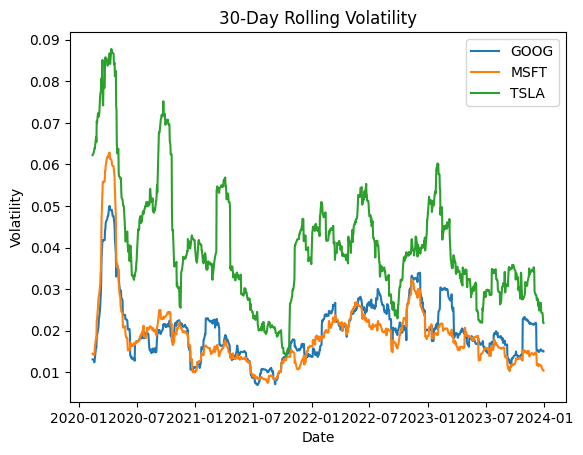

<Figure size 640x480 with 0 Axes>

In [9]:
# 30-day rolling standard deviation of daily returns
combined_data["Volatility"] = combined_data.groupby("Ticker")["Daily Return"].transform(lambda x: x.rolling(window=30).std())

# Plot rolling volatility for each stock
for ticker in combined_data["Ticker"].unique():
    ticker_data = combined_data[combined_data["Ticker"] == ticker]
    plt.plot(ticker_data["Date"], ticker_data["Volatility"], label=ticker)

plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# save image
plt.savefig("../graphs/volatility.png")


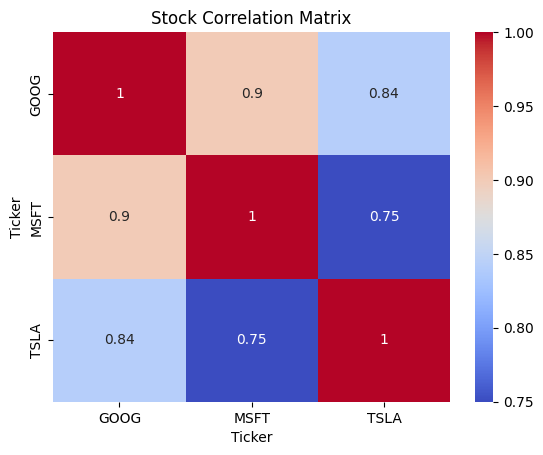

<Figure size 640x480 with 0 Axes>

In [10]:
# Pivot data to create a matrix of closing prices
pivot_data = combined_data.pivot(index="Date", columns="Ticker", values="Close")

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Stock Correlation Matrix")
plt.show()

# save image
plt.savefig("../graphs/correlation_matrix.png")

In [11]:
combined_data.to_csv("../data-output/enhanced_combined_stock_data.csv", index=False)
print("Enhanced data saved to '../data-output/enhanced_combined_stock_data.csv'")

Enhanced data saved to '../data-output/enhanced_combined_stock_data.csv'
